In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy 
import os
import re
import MDAnalysis
import nmrglue as ng
%matplotlib inline

# This is the analysis notebook for KcsA inactivated state
The trajactory is based on PDB 5KVE and 100 ns MD simulation, frames are saved every 100 ps and of the 1000 saved frames, 1/10 are evenly sampled to run restrainted minimized, results of which are used for AF-NMR MM/QM calculation 

Data location:  
MD trajctory:/Users/yunyao_1/Dropbox/KcsA/kcsa_inactivation3/kcsa_inactivation_3_trj
calcualted CS results:/Users/yunyao_1/Dropbox/KcsA/kcsa_inactivation3/QMMM_results/results
Mimimized snapshots:/Users/yunyao_1/Dropbox/KcsA/kcsa_inactivation3/QMMM_results/minimized_snapshots

In [2]:
#directory for calcuated chemical shift inforamtion
dir_cc='/Users/yunyao_1/Dropbox/KcsA/kcsa_inactivation3/QMMM_results/results'
# read files that starts with results
ccinactivated_dict={}
for file in os.listdir(dir_cc):
    if file[0]=='r':
        full_f=os.path.join(dir_cc,file)
        ccinactivated_dict[file.rstrip('.txt')]=pd.read_csv(full_f, sep='\t', header=None, names=['resNO','atom','resNam','iso','delta','ita','alpha','betta','gamma'])
            
        

In [3]:
#test if data were correctly read
if 'results_0' in ccinactivated_dict.keys():
    print('yes')

yes


In [4]:
#first to check chemical shift for V76 ang G77 residues
#index for V77:V76_index=[76-22+n*103+1 for n in range(4)]
#index for G77:
#testing whether indexing is right
'''
V76_index=[76-22+n*103+1 for n in range(4)]
V76_index
[55, 158, 261, 364]
match with the QM output indexing
'''


'\nV76_index=[76-22+n*103+1 for n in range(4)]\nV76_index\n[55, 158, 261, 364]\nmatch with the QM output indexing\n'

In [16]:
import re
import pandas as pd

# Assuming ccinactivated_dict is already defined
for key in ccinactivated_dict.keys():
    # Extract frame number and assign it
    frame_number = int(re.findall(r'\d+', key)[0])
    ccinactivated_dict[key]['frame'] = [frame_number] * len(ccinactivated_dict[key])
    
    # Assign residue numbers safely
    ccinactivated_dict[key]['resNO'] = ccinactivated_dict[key]['resNO'].apply(
        lambda x: int(x) if str(x).isdigit() else None
    )

# Combine all data into a single DataFrame
ccinactivated_df = pd.concat(ccinactivated_dict.values(), ignore_index=True)

# Drop rows with invalid residue numbers and sort the DataFrame
ccinactivated_df.dropna(subset=['resNO'], inplace=True)
ccinactivated_df['resNO'] = ccinactivated_df['resNO'].astype(int)
ccinactivated_df.sort_values(by=['frame', 'resNO'], inplace=True)

# Check the data
print(ccinactivated_df.head())

# Save the cleaned data to a CSV file
ccinactivated_df.to_csv('KcsA_Inactivated_df_MMQM_CS.csv', index=False)

# plot the chemical shift for V76 and G77

      resNO atom resNam      iso    delta    ita    alpha    betta    gamma  \
9440     46    C    GLU  178.071   82.431  0.889   16.324  -70.702   89.564   
9441     47    N    THR  108.294  100.840  0.183   31.866  173.874  192.377   
9442     47    H    THR    5.318    5.821  0.517   22.061   29.288   32.296   
9443     47   CA    THR   70.934  -23.021  0.138  105.771  108.938  141.887   
9444     47   HA    THR    3.665   -1.899  0.672   27.948   29.224   31.434   

      frame  
9440      0  
9441      0  
9442      0  
9443      0  
9444      0  


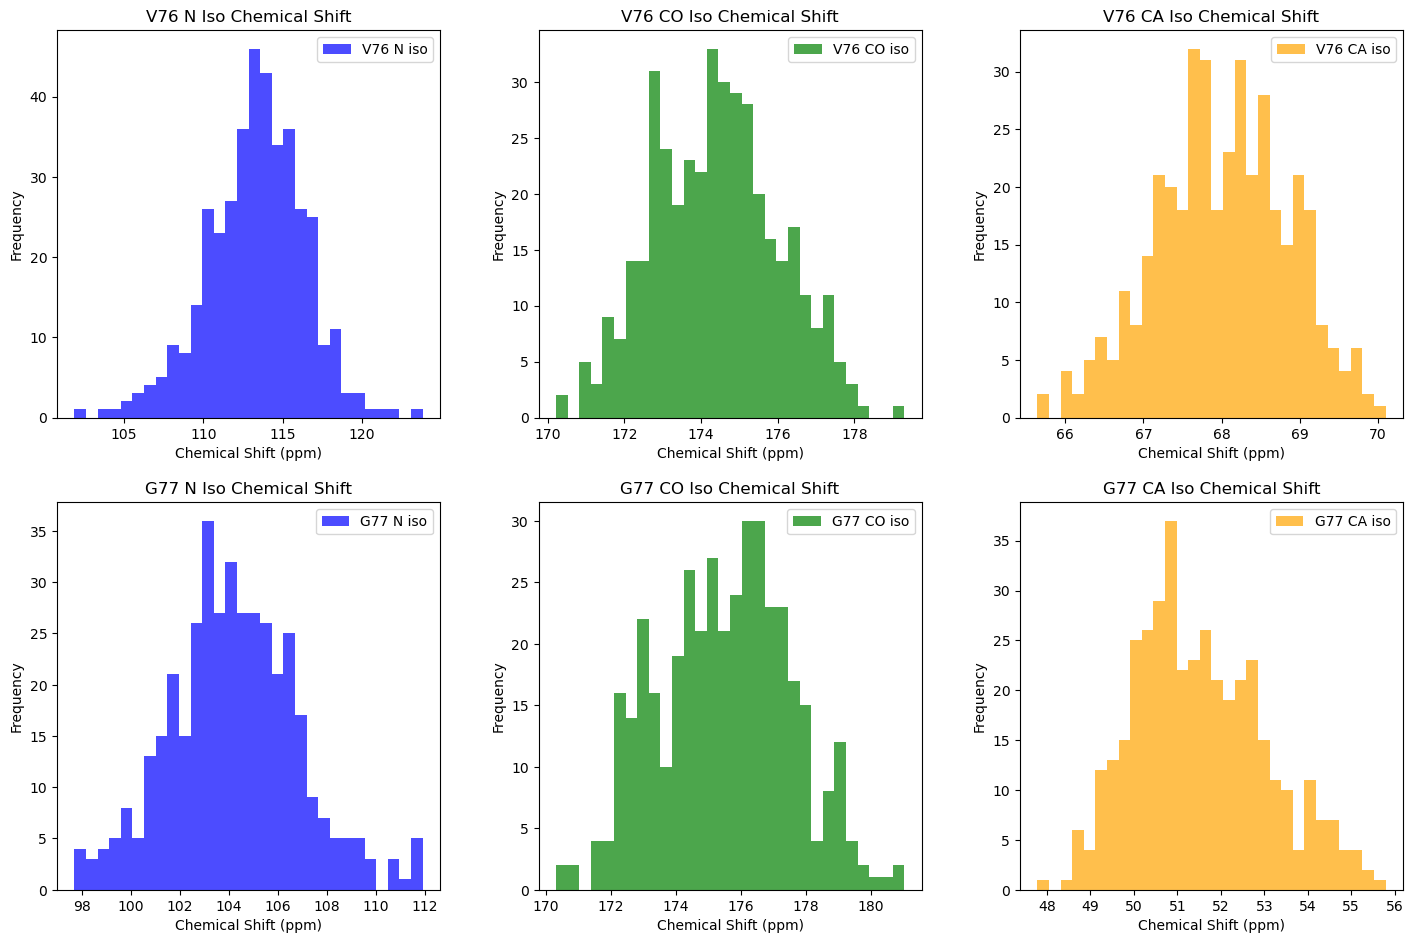

In [6]:
import matplotlib.pyplot as plt

# Define indices for residues
V76_index = [76 - 26 + n * 96 + 1 for n in range(4)]
G77_index = [77 - 26 + n * 96 + 1 for n in range(4)]

# Filter rows for V76 and exclude rows where 'atom' starts with 'H'
V76_df = ccinactivated_df[
    ccinactivated_df['resNO'].isin(V76_index) &
    (~ccinactivated_df['atom'].str.startswith('H'))
].copy()

# Filter rows for G77 and exclude rows where 'atom' starts with 'H'
G77_df = ccinactivated_df[
    ccinactivated_df['resNO'].isin(G77_index) &
    (~ccinactivated_df['atom'].str.startswith('H'))
].copy()

# Create 2x3 subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.tight_layout(pad=4.0)  # Adjust spacing between subplots

# Define colors for N, C, CA
colors = {'N': 'blue', 'C': 'green', 'CA': 'orange'}

# Plot histograms for V76
axes[0, 0].hist(V76_df[V76_df['atom'] == 'N']['iso'], bins=30, alpha=0.7, color=colors['N'], label='V76 N iso')
axes[0, 0].set_title('V76 N Iso Chemical Shift')
axes[0, 0].set_xlabel('Chemical Shift (ppm)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

axes[0, 1].hist(V76_df[V76_df['atom'] == 'C']['iso'], bins=30, alpha=0.7, color=colors['C'], label='V76 CO iso')
axes[0, 1].set_title('V76 CO Iso Chemical Shift')
axes[0, 1].set_xlabel('Chemical Shift (ppm)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

axes[0, 2].hist(V76_df[V76_df['atom'] == 'CA']['iso'], bins=30, alpha=0.7, color=colors['CA'], label='V76 CA iso')
axes[0, 2].set_title('V76 CA Iso Chemical Shift')
axes[0, 2].set_xlabel('Chemical Shift (ppm)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].legend()

# Plot histograms for G77
axes[1, 0].hist(G77_df[G77_df['atom'] == 'N']['iso'], bins=30, alpha=0.7, color=colors['N'], label='G77 N iso')
axes[1, 0].set_title('G77 N Iso Chemical Shift')
axes[1, 0].set_xlabel('Chemical Shift (ppm)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()

axes[1, 1].hist(G77_df[G77_df['atom'] == 'C']['iso'], bins=30, alpha=0.7, color=colors['C'], label='G77 CO iso')
axes[1, 1].set_title('G77 CO Iso Chemical Shift')
axes[1, 1].set_xlabel('Chemical Shift (ppm)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

axes[1, 2].hist(G77_df[G77_df['atom'] == 'CA']['iso'], bins=30, alpha=0.7, color=colors['CA'], label='G77 CA iso')
axes[1, 2].set_title('G77 CA Iso Chemical Shift')
axes[1, 2].set_xlabel('Chemical Shift (ppm)')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].legend()

# Show the plot
plt.show()


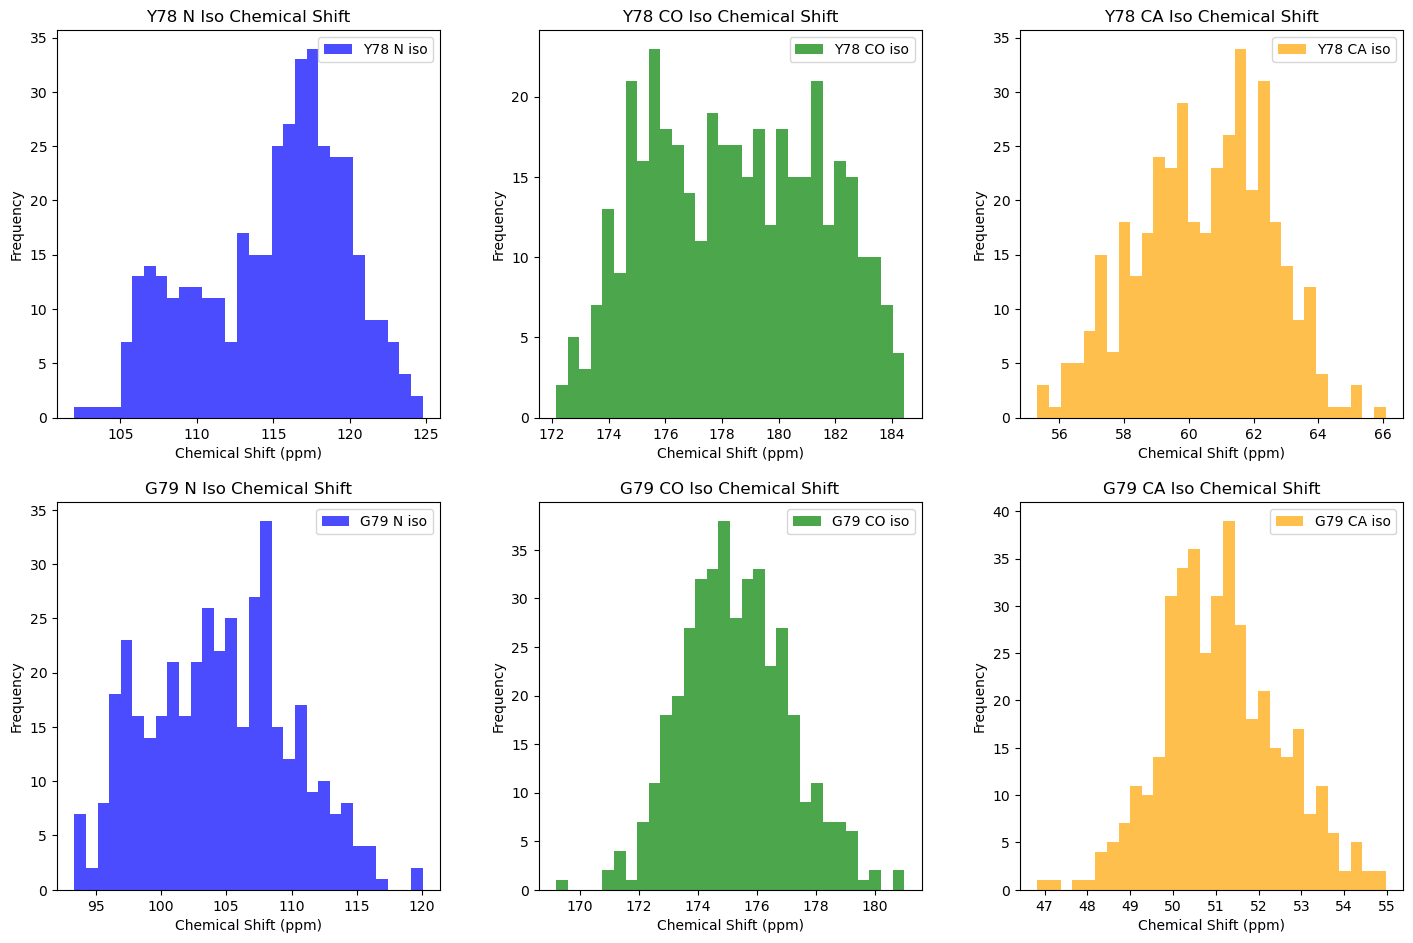

In [7]:
import matplotlib.pyplot as plt

# Define indices for residues
Y78_index = [78 - 26 + n * 96 + 1 for n in range(4)]
G79_index = [79 - 26 + n * 96 + 1 for n in range(4)]

# Filter rows for Y78 and exclude rows where 'atom' starts with 'H'
Y78_df = ccinactivated_df[
    ccinactivated_df['resNO'].isin(Y78_index) &
    (~ccinactivated_df['atom'].str.startswith('H'))
].copy()

# Filter rows for G79 and exclude rows where 'atom' starts with 'H'
G79_df = ccinactivated_df[
    ccinactivated_df['resNO'].isin(G79_index) &
    (~ccinactivated_df['atom'].str.startswith('H'))
].copy()

# Create 2x3 subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.tight_layout(pad=4.0)  # Adjust spacing between subplots

# Define colors for N, C, CA
colors = {'N': 'blue', 'C': 'green', 'CA': 'orange'}

# Plot histograms for Y78
axes[0, 0].hist(Y78_df[Y78_df['atom'] == 'N']['iso'], bins=30, alpha=0.7, color=colors['N'], label='Y78 N iso')
axes[0, 0].set_title('Y78 N Iso Chemical Shift')
axes[0, 0].set_xlabel('Chemical Shift (ppm)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

axes[0, 1].hist(Y78_df[Y78_df['atom'] == 'C']['iso'], bins=30, alpha=0.7, color=colors['C'], label='Y78 CO iso')
axes[0, 1].set_title('Y78 CO Iso Chemical Shift')
axes[0, 1].set_xlabel('Chemical Shift (ppm)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

axes[0, 2].hist(Y78_df[Y78_df['atom'] == 'CA']['iso'], bins=30, alpha=0.7, color=colors['CA'], label='Y78 CA iso')
axes[0, 2].set_title('Y78 CA Iso Chemical Shift')
axes[0, 2].set_xlabel('Chemical Shift (ppm)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].legend()

# Plot histograms for G79
axes[1, 0].hist(G79_df[G79_df['atom'] == 'N']['iso'], bins=30, alpha=0.7, color=colors['N'], label='G79 N iso')
axes[1, 0].set_title('G79 N Iso Chemical Shift')
axes[1, 0].set_xlabel('Chemical Shift (ppm)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()

axes[1, 1].hist(G79_df[G79_df['atom'] == 'C']['iso'], bins=30, alpha=0.7, color=colors['C'], label='G79 CO iso')
axes[1, 1].set_title('G79 CO Iso Chemical Shift')
axes[1, 1].set_xlabel('Chemical Shift (ppm)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

axes[1, 2].hist(G79_df[G79_df['atom'] == 'CA']['iso'], bins=30, alpha=0.7, color=colors['CA'], label='G79 CA iso')
axes[1, 2].set_title('G79 CA Iso Chemical Shift')
axes[1, 2].set_xlabel('Chemical Shift (ppm)')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].legend()

# Show the plot
plt.show()


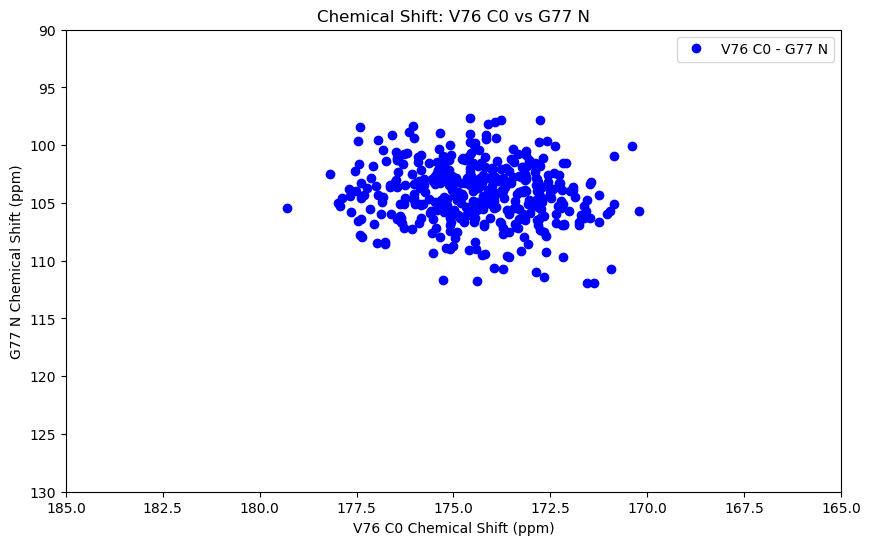

In [8]:
#plot the chemical shift for V76 C0- G77 N
plt.figure(figsize=(10, 6))
# convert data to numpy arrays for plotting
CO= np.array(V76_df[V76_df['atom'] == 'C']['iso'])
N = np.array(G77_df[G77_df['atom'] == 'N']['iso'])      
plt.plot(CO, N, marker='o', linestyle='None', color='blue', label='V76 C0 - G77 N')
plt.title('Chemical Shift: V76 C0 vs G77 N')
plt.xlabel('V76 C0 Chemical Shift (ppm)')
plt.ylabel('G77 N Chemical Shift (ppm)')
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
plt.axvline(x=0, color='k', linestyle='--', linewidth=0.5)
plt.xlim(185, 165)
plt.ylim(130, 90)
#plt.grid()
plt.legend()
plt.show()
#plt.plot(V76_df[V76_df['atom'] == 'C']['iso'], G77_df[G77_df['atom'] == 'N']['iso'],marker='o', label='NCO')

In [ ]:
import numpy as np
import MDAnalysis
import pandas as pd
import os
from MDAnalysis.analysis.dihedrals import Dihedral

# Function to calculate torsion angles for a residue
def calculate_torsion_angles(u, residue):
    """
    Calculate the phi and psi torsion angles for a given residue.
    cautions:
    - The residue index is 0-based in MDAnalysis, so adjust accordingly.
    
    Parameters:
    u (MDAnalysis Universe): The universe containing the structure.
    residue (int): Residue number for which torsion angles are calculated.
    
    Returns:
    tuple: (phi angle, psi angle) in degrees.
    """
    try:
        # Select atoms for phi and psi calculations
        phi_atoms = u.residues[residue].phi_selection()
        psi_atoms = u.residues[residue].psi_selection()
        
        # Calculate dihedral angles
        dihedral_phi = Dihedral([phi_atoms]).run()
        dihedral_psi = Dihedral([psi_atoms]).run()
        
        return dihedral_phi.results.angles[0], dihedral_psi.results.angles[0]
    except Exception as e:
        # Handle residues without valid torsion angles
        return None, None

# Directory containing the structure files
data_dir = '/Users/yunyao_1/Dropbox/KcsA/kcsa_inactivation3/QMMM_results/minimized_snapshots'

# Get all PDB files in the directory
pdb_files = [f for f in os.listdir(data_dir) if f.endswith('.pdb')]

# Unique residue numbers from the DataFrame
residues = ccinactivated_df['resNO'].unique()

# List to store torsion angle results
results = []

# Process each PDB file
for pdb_file in pdb_files:
    # Extract frame number from file name
    frame_number = int(pdb_file.split('_')[2])
    
    # Load the PDB file into MDAnalysis Universe
    u = MDAnalysis.Universe(os.path.join(data_dir, pdb_file))
    
    # Calculate torsion angles for all residues
    for residue in residues:
        torsion_phi, torsion_psi = calculate_torsion_angles(u, residue-1)#  # Adjust for 0-based indexing
        if torsion_phi is not None and torsion_psi is not None:
            results.append({
                'frame': frame_number,
                'residue': residue,
                'torsion_angle_phi': torsion_phi[0],
                'torsion_angle_psi': torsion_psi[0]
            })

# Convert results to a DataFrame
torsion_angles = pd.DataFrame(results)

# Save to CSV (optional)
torsion_angles.to_csv('Inactivated_torsion_angles.csv', index=False)

print("Torsion angle calculations completed!")


/Users/yunyao_1/miniforge3/envs/KcsA_torsion/lib/python3.8/site-packages/MDAnalysis/analysis/data/filenames.py:110: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_filename
/Users/yunyao_1/miniforge3/envs/KcsA_torsion/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


Torsion angle calculations completed!


In [22]:
import numpy as np
import MDAnalysis
import pandas as pd
import os
from MDAnalysis.analysis.dihedrals import Dihedral

# Function to calculate torsion angles for a residue
def calculate_torsion_angles(u, resid):
    """
    Calculate the phi and psi torsion angles for a given residue ID
    cautions:
    - The residue index is 0-based in MDAnalysis, so adjust accordingly.
    
    Parameters:
    u (MDAnalysis Universe): The universe containing the structure.
    residues (list): Residue number for which torsion angles are calculated.
    
    Returns:
    tuple: (phi angle, psi angle) in degrees.
    """
    try:
        # Select atoms for phi and psi calculations
        residue = u.select_atoms(f"resid {resid}").residues[0]
        phi_atoms = residue.phi_selection()
        psi_atoms = residue.psi_selection()
        
        # Calculate dihedral angles
        dihedral_phi = Dihedral([phi_atoms]).run()
        dihedral_psi = Dihedral([psi_atoms]).run()

        #  # Extract and format the results to 3 decimal places
        phi_angle = dihedral_phi.results.angles[0]
        psi_angle = dihedral_psi.results.angles[0]
        
        return phi_angle, psi_angle
    except Exception as e:
        # Handle residues without valid torsion angles
        return None, None

# Directory containing the structure files
data_dir = '/Users/yunyao_1/Dropbox/KcsA/kcsa_inactivation3/QMMM_results/minimized_snapshots'

# Get all PDB files in the directory
pdb_files = [f for f in os.listdir(data_dir) if f.endswith('.pdb')]

# Unique residue numbers from the DataFrame
residues = pd.to_numeric(ccinactivated_df['resNO'], errors='coerce').dropna().astype(int).unique()

# List to store torsion angle results
results = []

# Process each PDB file
for pdb_file in pdb_files:
    # Extract frame number from file name:kcsa_100ns_0111/snapshots_minimized_0130/kcsa_100ns_schrodinger_10.pdb
    frame_number = int(pdb_file.split('_')[2])
    #frame_number = int(pdb_file.split('_')[3].split('.')[0])  # Assuming the frame number is in the file name
    #print(frame_number)
    # Load the PDB file into MDAnalysis Universe
    u = MDAnalysis.Universe(os.path.join(data_dir, pdb_file))
    
    # Calculate torsion angles for all residues
    for residue in residues:
        torsion_phi, torsion_psi = calculate_torsion_angles(u, residue) # Adjust for 0-based indexing in MDAnalysis
        print(f"Frame: {frame_number}, Residue: {residue}, residue_type:{u.select_atoms(f'resid {residue}').residues[0].resname} Phi: {torsion_phi}, Psi: {torsion_psi}")
        if torsion_phi is not None and torsion_psi is not None:
            results.append({
                'frame': frame_number,
                'residue': residue,
                'torsion_angle_phi': torsion_phi[0],
                'torsion_angle_psi': torsion_psi[0]
            })

#Convert results to a DataFrame
torsion_angles = pd.DataFrame(results)

#Save to CSV (optional)
torsion_angles.to_csv('Inactivated_torsion_angles.csv', index=False)

print("Torsion angle calculations completed!")

/Users/yunyao_1/miniforge3/envs/KcsA_torsion/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


Frame: 60, Residue: 46, residue_type:GLU Phi: [-56.21316591], Psi: [-39.2674709]
Frame: 60, Residue: 47, residue_type:THR Phi: [-80.69119613], Psi: [-30.52013296]
Frame: 60, Residue: 48, residue_type:ALA Phi: [-81.28353249], Psi: [-40.76307597]
Frame: 60, Residue: 49, residue_type:THR Phi: [-82.41702691], Psi: [-23.80314312]
Frame: 60, Residue: 50, residue_type:THR Phi: [71.25925894], Psi: [30.97976649]
Frame: 60, Residue: 51, residue_type:VAL Phi: [-58.91714084], Psi: [-45.81830634]
Frame: 60, Residue: 52, residue_type:GLY Phi: [80.81046196], Psi: [47.87858345]
Frame: 60, Residue: 53, residue_type:TYR Phi: [-76.15613698], Psi: [-27.55017065]
Frame: 60, Residue: 54, residue_type:GLY Phi: [66.83258712], Psi: [13.43309578]
Frame: 60, Residue: 55, residue_type:ASP Phi: [-81.84595644], Psi: [-12.93017389]
Frame: 60, Residue: 56, residue_type:LEU Phi: [-135.4418776], Psi: [128.17749104]
Frame: 60, Residue: 142, residue_type:GLU Phi: [-71.43138906], Psi: [-38.41349922]
Frame: 60, Residue: 14

In [23]:
# merge the torsion angles with the chemical shift data
torsion_angles['resNO'] = torsion_angles['residue']  # Rename for merging
#convert angles to float for consistency
torsion_angles['torsion_angle_phi'] = torsion_angles['torsion_angle_phi'].astype(float)
torsion_angles['torsion_angle_psi'] = torsion_angles['torsion_angle_psi'].astype(float)
merged_df = pd.merge(ccinactivated_df, torsion_angles, on=['frame', 'resNO'], how='left')

# Save the merged DataFrame to a CSV file
merged_df.to_csv('KcsA_Inactivated_df_MMQM_CS_torsion.csv', index=False)